In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from MulticoreTSNE import MulticoreTSNE as TSNE

In [2]:
X = np.load('../data/mnist/X.npy')
y = np.load('../data/mnist/y.npy')

X_train, _, y_train, _ = train_test_split(X, y, train_size=5000, stratify=y, random_state=420)

In [3]:
X_tsne = TSNE(n_jobs=16).fit_transform(X_train)

In [16]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X_tsne, y_train)

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, knn.predict(X_tsne)))
knn.predict(X_tsne)

0.9312


array([9, 2, 6, ..., 4, 8, 3])

In [18]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(
    [
        "#aee39a",
        "#9e37d0",
        "#7cee4d",
        "#713d83",
        "#1be19f",
        "#fb2076",
        "#458612",
        "#e89ff0",
        "#115d52",
        "#f79302",
    ]
)


In [19]:
knn.predict_proba(X_tsne[:10])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.27272727, 0.        , 0.0909090

(-47.995297160429224, 45.80887187683892, -42.98987883007368, 40.82199928365965)

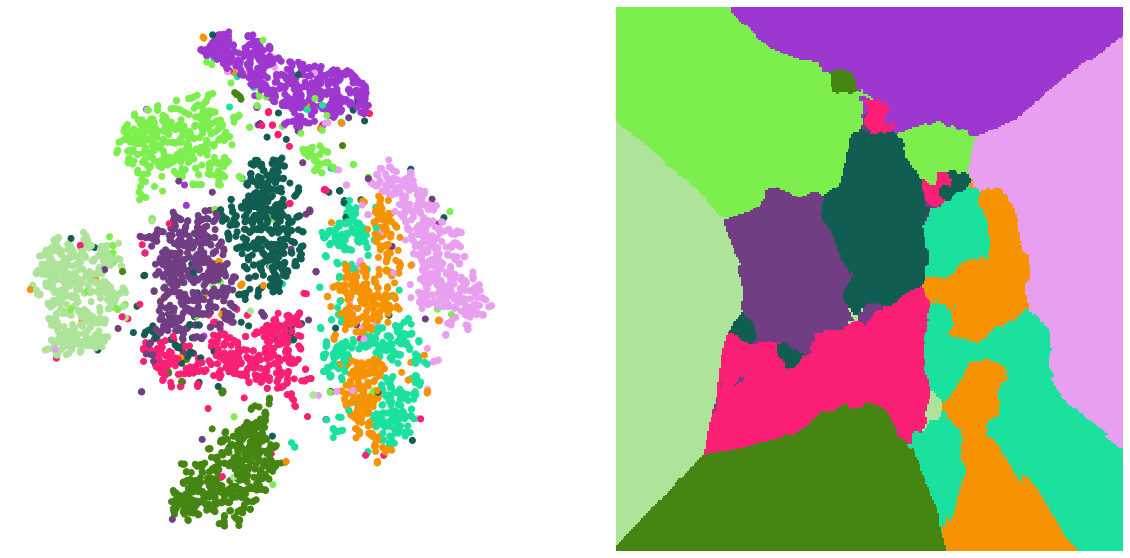

In [22]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=cmap)
ax1.axis('off')

disp = DecisionBoundaryDisplay.from_estimator(
    knn, X_tsne, grid_resolution=300, plot_method="pcolormesh", response_method="predict", cmap=cmap, ax=ax2
)
disp.ax_.axis('off')



In [23]:
import sys
sys.path.append('../code/')

import ssnp_vae  # type: ignore

In [ ]:
sharp = ssnp_vae.V_SSNP(
    X_train.shape[1],
    len(np.unique(y_train)),
    variational_layer="diagonal_normal",
    variational_layer_kwargs=dict(kl_weight=0.01),
    bottleneck_activation="linear",
    bottleneck_l1=0.0,
    bottleneck_l2=0.5,
)
sharp.fit(X_train, y_train, epochs=20, verbose=False, batch_size=64)


In [25]:
X_sharp = sharp.transform(X_train)

157/157 [==============================] - 1s 4ms/step


In [34]:
grid = np.c_[disp.xx0.ravel(), disp.xx1.ravel()]
labeled = np.argmax(sharp.class_model.predict(grid), axis=1)


2813/2813 [==============================] - 3s 1ms/step


(-0.5, 299.5, -0.5, 299.5)

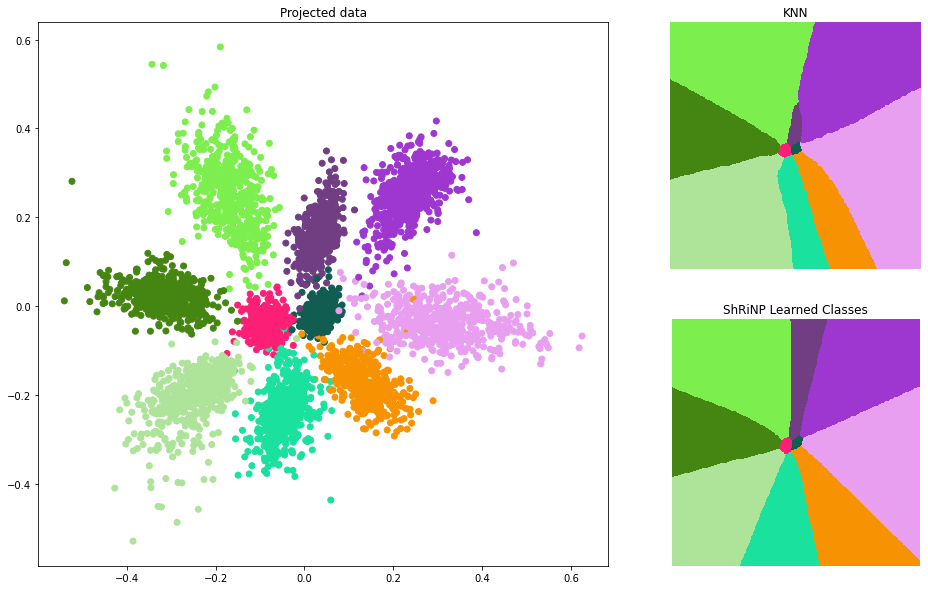

In [47]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, axes = plt.subplot_mosaic(
    """
    AAB
    AAC
    """,
    figsize=(16, 10),
    # tight_layout=True,
)

ax1 = axes["A"]
ax1.set_title('Projected data')
ax1.scatter(X_sharp[:, 0], X_sharp[:, 1], c=y_train, cmap=cmap)
# ax1.axis('off')
ax1.set_aspect("equal")


knn_sharp = KNeighborsClassifier(n_neighbors=11).fit(X_sharp, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    knn_sharp,
    X_sharp,
    grid_resolution=300,
    plot_method="pcolormesh",
    response_method="predict",
    cmap=cmap,
    ax=axes["B"],
)
disp.ax_.set_title('KNN')
disp.ax_.axis("off")
disp.ax_.set_aspect("equal")

ax3 = axes["C"]
ax3.imshow(
    labeled.reshape(300, 300).astype(np.uint8),
    cmap=cmap,
    origin="lower",
    interpolation="none",
    resample=False,
)
ax3.set_title('ShRiNP Learned Classes')
ax3.axis("off")
